# Case Study - 1 Group 06 (Q2 Linear Regression)

Sreeja Thazhathethil - 101270113

Yagna Priyadarshni Himachalapathy - 101264712

Bensy Chitteth -  101263628

Kalpesh Bhurabhai Odedra - 101331600

Suraj Rampure - 101344591

Mirza Razin Alam - 101329992

**21.3 TAYKO SOFTWARE CATALOGER**

Develop a model for predicting spend among purchasers. Refer to problem #3 in case
study. Create subsets of the training and validation sets for only purchasers’ records
by filtering for Purchase = 1. Develop models for predicting spending with the filtered
datasets, using: Multiple linear regression (use stepwise regression). Choose one
model on the basis of its performance on the validation data. Please submit Python
code.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import statsmodels.api as sm

# Exploratory Analysis

In [3]:
tayko_df = pd.read_csv('Tayko(1).csv')

In [4]:
#Displaying the shape
tayko_df.shape 

(2000, 25)

In [5]:
#Displaying first few records
tayko_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [6]:
#datatypes of the variables
tayko_df.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [7]:
#ALl columns have an underscore hence renaming just the web order column with an underscore
tayko_df = tayko_df.rename(columns={'Web order': 'Web_Order'})

In [8]:
list(tayko_df.columns)

['sequence_number',
 'US',
 'source_a',
 'source_c',
 'source_b',
 'source_d',
 'source_e',
 'source_m',
 'source_o',
 'source_h',
 'source_r',
 'source_s',
 'source_t',
 'source_u',
 'source_p',
 'source_x',
 'source_w',
 'Freq',
 'last_update_days_ago',
 '1st_update_days_ago',
 'Web_Order',
 'Gender=male',
 'Address_is_res',
 'Purchase',
 'Spending']

In [9]:
#Descriptive Statistics
tayko_df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [10]:
#Checking for missing values
tayko_df.isnull().values.any()

False

**If there were any missing values we could drop those rows or replace the null values with the mean/median of the variables.**

In [11]:
#Select all orders where purchas=1
tayko_pur=tayko_df[tayko_df['Purchase']==1]


In [12]:
# check if we got all the purchases.
tayko_pur.Purchase.value_counts()

1    1000
Name: Purchase, dtype: int64

**1000 records where purchase = 1**

In [13]:
#Remove certain variables from the onset (i.e., Purchase and sequence number)
# Purchase is a categorical variable indicating if purchase was made. Therefore it has no impact on spending since its 
# an outcome variable too.
tayko_pur = tayko_pur.drop(columns =["Purchase", "sequence_number"])
tayko_pur.head(5)

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,128
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,127
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,4,525,2914,1,1,0,489
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,3215,3215,0,0,0,174
13,1,1,0,0,0,0,0,0,0,0,...,0,0,0,5,2081,2438,0,1,0,1416


In [14]:
#Following are the distinct number of unique values for each variable
tayko_pur.nunique(axis=0)

US                        2
source_a                  2
source_c                  2
source_b                  2
source_d                  2
source_e                  2
source_m                  2
source_o                  2
source_h                  2
source_r                  2
source_s                  2
source_t                  2
source_u                  2
source_p                  2
source_x                  2
source_w                  2
Freq                     14
last_update_days_ago    642
1st_update_days_ago     635
Web_Order                 2
Gender=male               2
Address_is_res            2
Spending                361
dtype: int64

**As we do not have any Categorical datatype, dummy variables are not needed**

<AxesSubplot:xlabel='source_w', ylabel='count'>

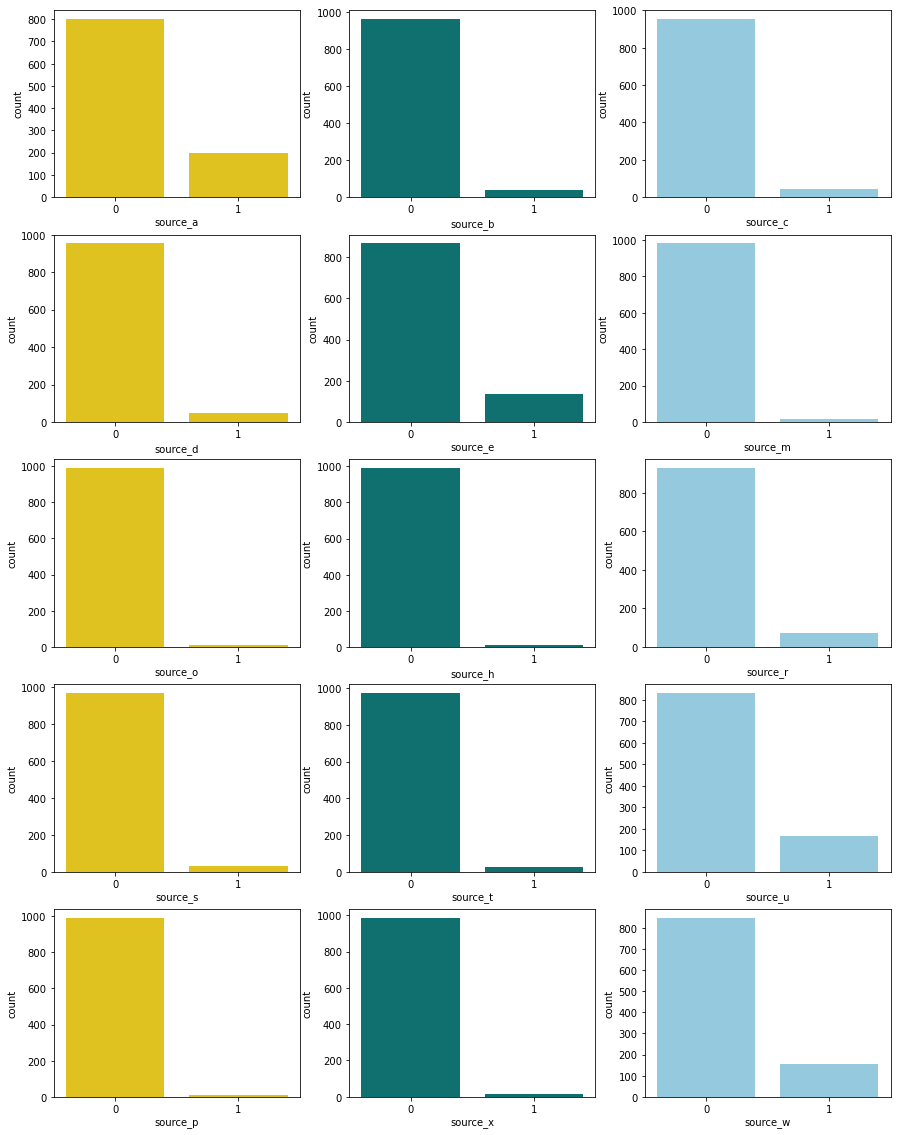

In [15]:
# looking at counts of 0 & 1 in each of the source varibales.
import warnings
warnings.filterwarnings("ignore")
df = tayko_pur
 
f, axes = plt.subplots(5, 3, figsize=(15, 20),)
sns.countplot( df["source_a"] , color="gold",  ax=axes[0, 0])
sns.countplot( df["source_b"] , color="teal", ax=axes[0, 1])
sns.countplot( df["source_c"] , color="skyblue", ax=axes[0, 2])
sns.countplot( df["source_d"] , color="gold", ax=axes[1, 0])
sns.countplot( df["source_e"] , color="teal", ax=axes[1, 1])
sns.countplot( df["source_m"] , color="skyblue", ax=axes[1, 2])
sns.countplot( df["source_o"] , color="gold", ax=axes[2, 0])
sns.countplot( df["source_h"] , color="teal", ax=axes[2, 1])
sns.countplot( df["source_r"] , color="skyblue", ax=axes[2, 2])
sns.countplot( df["source_s"] , color="gold", ax=axes[3, 0])
sns.countplot( df["source_t"] , color="teal", ax=axes[3, 1])
sns.countplot( df["source_u"] , color="skyblue", ax=axes[3, 2])
sns.countplot( df["source_p"] , color="gold",ax=axes[4, 0])
sns.countplot( df["source_x"] , color="teal", ax=axes[4, 1])
sns.countplot( df["source_w"] , color="skyblue", ax=axes[4, 2])

<AxesSubplot:>

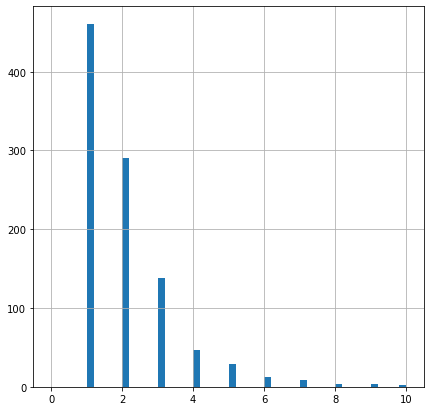

In [16]:
f,ax=plt.subplots(figsize=(7,7))
tayko_pur['Freq'].hist(bins = 50, range=[0,10],ax=ax)

<AxesSubplot:xlabel='Gender=male', ylabel='count'>

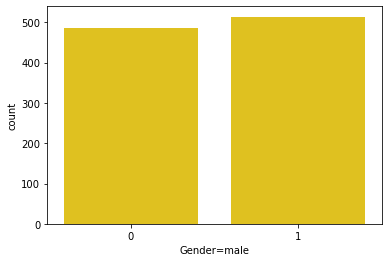

In [17]:
sns.countplot( df["Gender=male"] , color="gold")

<AxesSubplot:xlabel='1st_update_days_ago'>

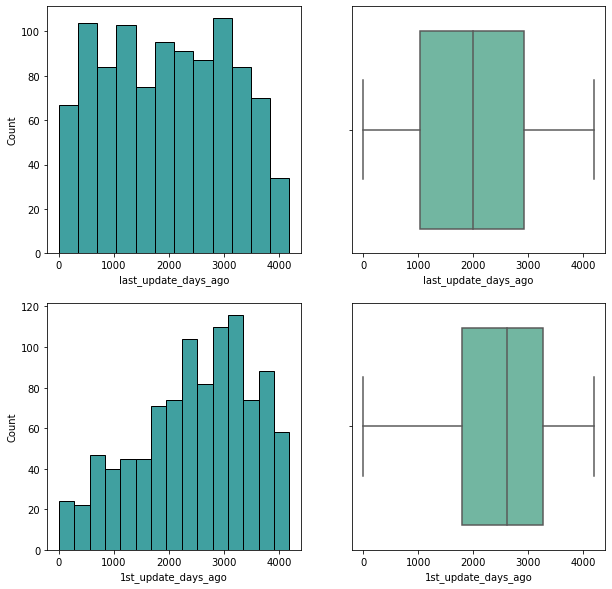

In [18]:
f, axes = plt.subplots(2,2, figsize=(10, 10))

sns.histplot(df['last_update_days_ago'] ,color="teal",ax=axes[0,0])

sns.boxplot(df['last_update_days_ago'] ,palette="Set2",ax=axes[0,1], orient="v")
sns.histplot(df['1st_update_days_ago'] ,color="teal",ax=axes[1,0])

sns.boxplot(df['1st_update_days_ago'] ,palette="Set2",ax=axes[1,1], orient="v")

### Almost equal number of male and non-males.

<AxesSubplot:xlabel='Freq', ylabel='Spending'>

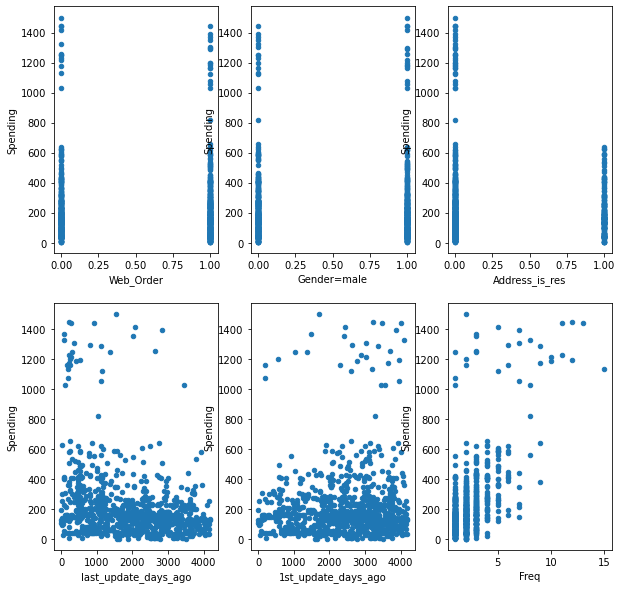

In [19]:
warnings.filterwarnings("ignore")
f,ax=plt.subplots(2,3,figsize=(10,10))

#Scatterplot showing the spending amount by the Web Order
df.plot.scatter ('Web_Order', 'Spending',ax=ax[0,0])

#Scatterplot showing the spending amount by the Gender=male
df.plot.scatter ('Gender=male', 'Spending',ax=ax[0,1])

#Scatterplot showing the spending amount by the Address_is_res
df.plot.scatter ('Address_is_res', 'Spending',ax=ax[0,2])

#Scatterplot showing the spending amount by the Address_is_res
df.plot.scatter ('last_update_days_ago', 'Spending',ax=ax[1,0])

#Scatterplot showing the spending amount by the Address_is_res
df.plot.scatter ('1st_update_days_ago', 'Spending',ax=ax[1,1])

#Scatterplot showing the spending amount by the Address_is_res
df.plot.scatter ('Freq', 'Spending',ax=ax[1,2])

## Correlation and PCA

In [20]:
corrMatrix =tayko_pur.corr().round(2)
corrMatrix

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Spending
US,1.00,0.14,0.06,0.04,0.10,-0.08,0.04,0.00,-0.05,0.01,...,-0.03,0.06,-0.20,0.04,0.09,0.15,0.03,0.06,0.03,-0.02
source_a,0.14,1.00,-0.11,-0.10,-0.11,-0.19,-0.07,-0.06,-0.05,-0.14,...,-0.05,-0.07,-0.21,0.09,0.17,0.29,0.04,0.05,-0.02,0.10
source_c,0.06,-0.11,1.00,-0.04,-0.05,-0.08,-0.03,-0.02,-0.02,-0.06,...,-0.02,-0.03,-0.09,0.02,-0.07,-0.01,0.03,-0.01,-0.03,-0.02
source_b,0.04,-0.10,-0.04,1.00,-0.04,-0.08,-0.03,-0.02,-0.02,-0.05,...,-0.02,-0.03,-0.08,0.04,0.13,0.17,-0.02,-0.04,0.01,-0.01
source_d,0.10,-0.11,-0.05,-0.04,1.00,-0.09,-0.03,-0.03,-0.02,-0.06,...,-0.02,-0.03,-0.09,0.03,0.13,0.14,-0.01,-0.02,-0.02,-0.02
source_e,-0.08,-0.19,-0.08,-0.08,-0.09,1.00,-0.05,-0.05,-0.04,-0.11,...,-0.04,-0.05,-0.17,0.00,-0.02,-0.05,-0.04,-0.03,0.02,-0.04
source_m,0.04,-0.07,-0.03,-0.03,-0.03,-0.05,1.00,-0.02,-0.02,-0.04,...,-0.01,-0.02,-0.06,-0.00,-0.07,-0.10,-0.03,0.02,0.03,-0.03
source_o,0.00,-0.06,-0.02,-0.02,-0.03,-0.05,-0.02,1.00,-0.01,-0.03,...,-0.01,-0.02,-0.05,-0.01,0.02,0.14,-0.00,0.01,0.02,-0.02
source_h,-0.05,-0.05,-0.02,-0.02,-0.02,-0.04,-0.02,-0.01,1.00,-0.03,...,-0.01,-0.01,-0.05,0.06,-0.07,-0.08,0.03,-0.06,0.18,-0.01
source_r,0.01,-0.14,-0.06,-0.05,-0.06,-0.11,-0.04,-0.03,-0.03,1.00,...,-0.03,-0.04,-0.12,0.02,0.01,-0.00,0.01,0.02,0.03,0.08


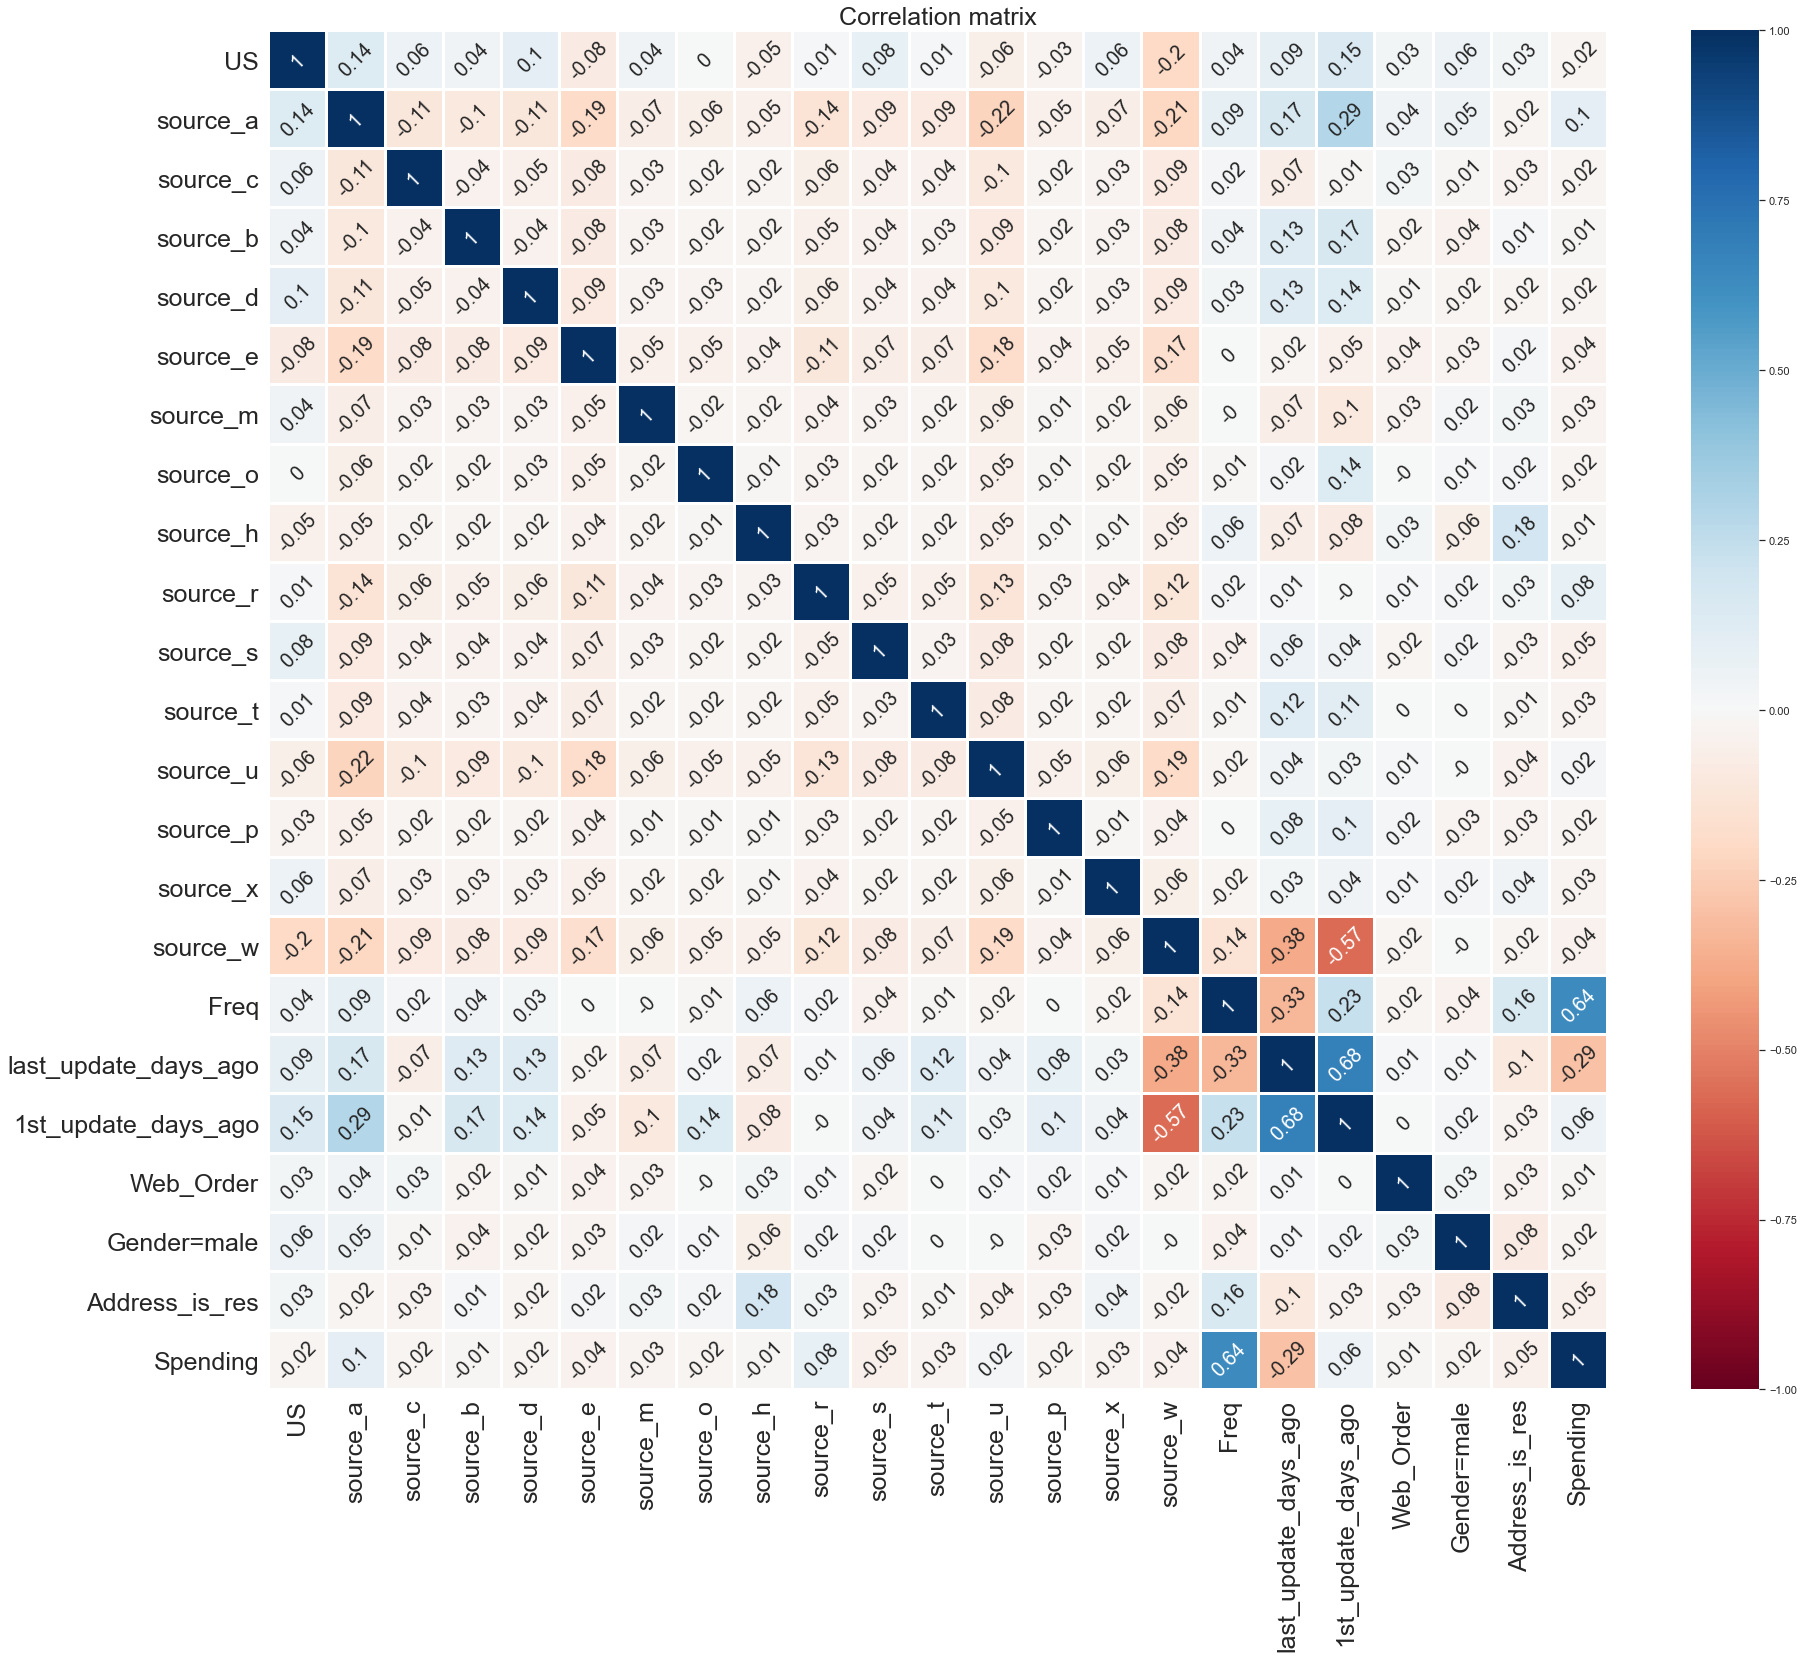

In [21]:
#Correlation table & Heatmap
sns.set(font_scale=0.1)
sns.set(rc={'figure.figsize':(30,25)})
r=sns.heatmap(corrMatrix, annot=True, linewidth = 2, cmap='RdBu',square=False, vmin = -1, vmax = 1,annot_kws={'size': 20,'rotation': 45})
plt.title('Correlation matrix', fontsize=25)
r.set_xticklabels(r.get_xmajorticklabels(), fontsize = 25)
r.set_yticklabels(r.get_ymajorticklabels(), fontsize = 25)

plt.show()

### The above correaltion table shows that there is:

- high positive correlation(0.64) between "Freq" and "Spending"
- high positive correlation(0.81) between "last_update_days_ago" and "1st_update_days_ago"

### No other pair has a strong positive or negative correlation indicating collinearity.

In [22]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

# PCA without normalizing

pcs = PCA()
pcs.fit(tayko_pur.iloc[:, 0:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation':
np.sqrt(pcs.explained_variance_), 'Proportion of variance':
pcs.explained_variance_ratio_,'Cumulative proportion':
np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1,
len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1397.023,613.899,192.708,0.993,0.511,0.492,0.428,0.398,0.384,0.366,...,0.211,0.194,0.183,0.173,0.143,0.132,0.116,0.108,0.104,0.028
Proportion of variance,0.825,0.159,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cumulative proportion,0.825,0.984,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**Cumilative to PC2 explains 98.4% variability in the dataset. PC1 and PC2 are enough without normalizing the data**

In [23]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index = tayko_pur.columns)
pcsComponents_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
US,-0.00,0.00,-0.00,0.00,-0.11,0.03,-0.30,0.16,-0.43,-0.72,...,-0.04,-0.03,-0.01,0.02,-0.00,-0.01,0.03,0.02,-0.00,0.00
source_a,-0.00,0.00,0.00,-0.02,-0.14,-0.00,-0.68,-0.17,-0.28,0.22,...,0.04,-0.06,-0.05,-0.03,-0.10,-0.02,-0.06,-0.04,0.00,-0.25
source_c,0.00,0.00,-0.00,-0.00,-0.01,-0.01,0.01,-0.02,-0.00,-0.07,...,-0.53,-0.57,-0.12,-0.12,-0.13,-0.05,-0.09,-0.04,-0.02,-0.25
source_b,-0.00,0.00,-0.00,0.01,0.02,-0.00,0.01,0.00,0.02,-0.01,...,-0.19,0.62,-0.64,-0.11,-0.22,-0.03,-0.09,-0.05,0.01,-0.26
source_d,-0.00,0.00,-0.00,0.01,0.01,-0.00,0.01,-0.01,0.01,-0.06,...,0.82,-0.17,-0.14,-0.07,-0.16,-0.03,-0.09,-0.04,0.00,-0.26
source_e,0.00,-0.00,-0.00,0.02,0.08,0.01,0.09,0.03,0.60,-0.44,...,0.01,-0.12,-0.04,-0.04,-0.09,-0.04,-0.07,-0.02,-0.02,-0.25
source_m,0.00,-0.00,-0.00,0.01,-0.00,0.01,-0.01,0.01,-0.01,-0.03,...,0.00,0.11,0.02,0.08,0.72,-0.54,-0.27,-0.03,-0.09,-0.26
source_o,-0.00,0.00,-0.00,-0.01,0.01,-0.00,0.01,0.01,0.02,0.01,...,-0.01,0.01,0.03,0.01,0.16,0.00,0.69,-0.62,0.18,-0.26
source_h,0.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,0.04,0.01,0.01,...,0.00,0.05,0.02,0.02,0.06,0.08,0.48,0.47,-0.67,-0.27
source_r,-0.00,-0.00,0.00,-0.00,-0.01,0.01,0.01,0.08,0.06,-0.06,...,0.05,-0.16,-0.06,-0.06,-0.11,-0.04,-0.08,-0.03,-0.02,-0.25


**Without normalizing, only 'last_update_days_ago' and '1st_update_days_ago' are adding significant weight to the PCAs. This is because these two variables are days and range upto 4000, while other variables are all mostly 0s and 1s**

In [24]:
# PCA with normalizing
PCApcs = PCA()
pcs.fit(preprocessing.scale(tayko_pur))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1.5472,1.3762,1.1397,1.1225,1.0827,1.0694,1.0513,1.0450,1.0383,1.0235,...,1.0106,1.0066,0.9782,0.9521,0.9194,0.8770,0.6837,0.5802,0.3461,0.1163
Proportion of variance,0.1040,0.0823,0.0564,0.0547,0.0509,0.0497,0.0480,0.0474,0.0468,0.0455,...,0.0444,0.0440,0.0416,0.0394,0.0367,0.0334,0.0203,0.0146,0.0052,0.0006
Cumulative proportion,0.1040,0.1862,0.2427,0.2974,0.3483,0.3980,0.4460,0.4934,0.5402,0.5857,...,0.7642,0.8082,0.8498,0.8892,0.9259,0.9593,0.9796,0.9942,0.9994,1.0000


**Cumilative to PC18 is 0.9259 which means PC1 to PC18 is needed to explain 92.59% of the variation in the data.**

In [25]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index = tayko_pur.columns)
pcsComponents_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
US,-0.21,0.06,-0.23,-0.36,0.24,-0.24,-0.11,-0.12,-0.04,0.02,...,-0.03,-0.00,0.03,-0.10,-0.54,0.53,-0.20,0.00,0.00,0.00
source_a,-0.25,0.18,-0.42,-0.22,-0.28,0.48,-0.17,-0.03,-0.10,0.03,...,0.08,-0.10,-0.20,-0.06,0.02,-0.03,0.28,0.03,0.07,-0.43
source_c,0.02,0.02,-0.10,-0.09,0.16,-0.27,-0.03,-0.30,0.68,-0.25,...,0.06,-0.20,-0.31,0.16,0.11,-0.17,-0.05,0.06,0.03,-0.22
source_b,-0.13,0.02,0.17,-0.02,-0.00,-0.04,0.42,-0.16,-0.18,-0.51,...,-0.08,-0.15,0.34,0.09,-0.03,0.05,0.22,0.06,0.03,-0.20
source_d,-0.13,-0.00,0.04,-0.09,0.10,-0.26,0.33,-0.30,-0.08,0.74,...,0.01,-0.10,0.11,0.08,0.08,-0.11,0.21,0.06,0.01,-0.23
source_e,0.04,-0.03,0.40,0.02,-0.58,-0.27,-0.44,-0.00,0.11,0.08,...,-0.07,-0.02,0.19,-0.01,-0.12,0.10,-0.08,0.02,-0.01,-0.37
source_m,0.06,-0.01,-0.02,-0.20,0.16,-0.20,-0.21,-0.09,-0.31,-0.15,...,0.62,0.11,0.20,-0.19,0.30,-0.10,-0.12,0.01,-0.02,-0.15
source_o,-0.07,-0.00,0.08,-0.03,0.01,0.04,0.08,0.05,-0.00,-0.18,...,0.10,-0.19,0.06,-0.12,-0.01,0.13,0.09,0.06,0.10,-0.12
source_h,0.08,0.08,0.35,-0.28,0.24,0.37,-0.05,0.02,0.12,0.08,...,-0.01,-0.07,0.12,0.34,0.39,0.45,-0.10,0.00,-0.04,-0.12
source_r,-0.00,0.07,0.01,-0.04,0.13,-0.27,0.19,0.81,0.08,0.07,...,0.13,-0.16,-0.14,-0.09,0.03,0.04,0.04,-0.07,0.00,-0.28


**By normalizing the predictor variables, we can now see that other variables are also contributing in each of the PCs**

## Linear Regression

In [26]:
y=tayko_pur["Spending"]
x=tayko_pur.drop(columns=["Spending"])

In [27]:
#Create training dataset and validation dataset
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [28]:
print(x.shape)
print(train_x.shape)
print(valid_x.shape)

(1000, 22)
(600, 22)
(400, 22)


In [29]:
#Descriptive stats of train_x
train_x.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.00000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.833333,0.203333,0.038333,0.043333,0.048333,0.118333,0.016667,0.011667,0.006667,0.078333,...,0.16500,0.010000,0.020000,0.16500,2.035000,1961.605000,2451.565000,0.558333,0.530000,0.220000
std,0.372989,0.402814,0.192160,0.203776,0.214649,0.323272,0.128126,0.107470,0.081445,0.268920,...,0.37149,0.099582,0.140117,0.37149,1.510268,1109.863554,1042.458198,0.497000,0.499516,0.414592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,1.000000,1017.750000,1716.500000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,2.000000,1965.500000,2607.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,2.000000,2909.000000,3262.500000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,12.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


In [30]:

#scale the train dataset 
train_x_scaled=(train_x-train_x.min())/(train_x.max()-train_x.min())

In [31]:
#Descriptive stats of train_y
train_y.describe()

count     600.000000
mean      201.878333
std       210.219498
min         3.000000
25%        97.000000
50%       153.000000
75%       237.750000
max      1500.000000
Name: Spending, dtype: float64

In [32]:
#Descriptive stats of valid_x
valid_x.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.832500,0.187500,0.052500,0.02500,0.045000,0.157500,0.022500,0.015000,0.020000,0.0675,...,0.175000,0.012500,0.012500,0.137500,2.140000,1995.117500,2511.112500,0.522500,0.490000,0.227500
std,0.373889,0.390801,0.223312,0.15632,0.207564,0.364728,0.148489,0.121705,0.140175,0.2512,...,0.380443,0.111242,0.111242,0.344806,1.722736,1132.353562,1017.539371,0.500119,0.500526,0.419743
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,50.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1035.500000,1878.750000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2038.500000,2618.500000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2933.250000,3280.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,...,1.000000,1.000000,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


In [35]:
#use train scale values to scale validation dataset to minimize data leakage

valid_x_scaled=(valid_x-train_x.min())/(train_x.max()-train_x.min())
valid_x_scaled.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res
963,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.181818,0.668259,0.679962,1.0,0.0,0.0
1599,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.272727,0.058276,0.622403,1.0,0.0,0.0
850,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.272727,0.191068,0.445187,1.0,1.0,0.0
667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.797946,0.797946,0.0,1.0,0.0
422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.180798,0.180798,0.0,1.0,0.0


In [57]:
valid_x_scaled['last_update_days_ago'].max()

1.0

In [33]:
#Descriptive stats of valid_y
valid_y.describe()

count     400.000000
mean      210.305000
std       235.821153
min         3.000000
25%        85.000000
50%       153.000000
75%       230.000000
max      1446.000000
Name: Spending, dtype: float64

In [36]:
tayko_lm = LinearRegression()
tayko_lm.fit(train_x_scaled, train_y)

LinearRegression()

In [37]:
# print coefficients
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': tayko_lm.coef_}))

               Predictor  coefficient
0                     US    -4.787858
1               source_a    33.355388
2               source_c   -50.895141
3               source_b   -21.249509
4               source_d   -10.435042
5               source_e    -1.452372
6               source_m   -74.468019
7               source_o    32.552540
8               source_h  -167.833939
9               source_r    57.681294
10              source_s   -33.916698
11              source_t   -26.878828
12              source_u    25.714261
13              source_p     8.554854
14              source_x   -12.370184
15              source_w    -4.917695
16                  Freq  1041.516679
17  last_update_days_ago     2.576604
18   1st_update_days_ago  -125.557503
19             Web_Order     5.992520
20           Gender=male     7.364279
21        Address_is_res   -77.872405


In [38]:
# print performance measures (training data)
regressionSummary(train_y, tayko_lm.predict(train_x_scaled))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 156.6754
            Mean Absolute Error (MAE) : 98.1824
          Mean Percentage Error (MPE) : -99.5626
Mean Absolute Percentage Error (MAPE) : 132.3070


In [39]:
tayko_lm_pred = tayko_lm.predict(valid_x_scaled)
result = pd.DataFrame({'Predicted': tayko_lm_pred,
'Actual': valid_y, 'Residual': valid_y - tayko_lm_pred})
print(result.head(20))

       Predicted  Actual    Residual
963   288.428243     104 -184.428243
1599  415.933504     655  239.066496
850   420.176371     253 -167.176371
667   113.120313      98  -15.120313
422   158.385811      83  -75.385811
1854  241.988487      42 -199.988487
453   128.490639     135    6.509361
1587  211.392043      69 -142.392043
570   212.763987     153  -59.763987
104   178.620051     164  -14.620051
836   336.780059     232 -104.780059
252    90.229313     141   50.770687
1948  140.704435      91  -49.704435
620   164.911612      57 -107.911612
1953  199.292089     248   48.707911
237   131.830328     130   -1.830328
193   124.999132      80  -44.999132
18    150.678922     130  -20.678922
1156   88.012015     306  217.987985
945    99.590721     136   36.409279


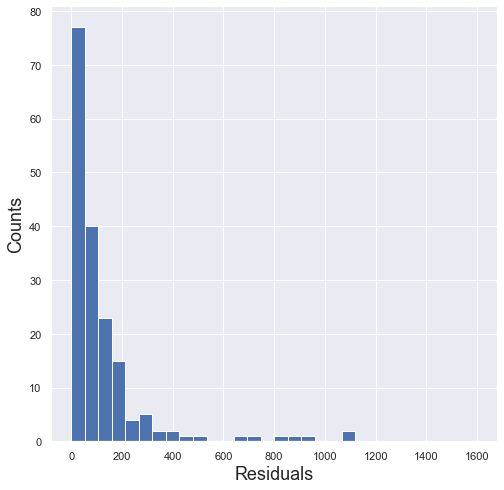

In [40]:
f,ax=plt.subplots(1,figsize=(8,8))
result['Residual'].hist(bins = 30, range=[0,1600],ax=ax)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.show()

In [41]:
# print performance measures (validation data)
regressionSummary(valid_y, tayko_lm_pred)


Regression statistics

                      Mean Error (ME) : 4.6401
       Root Mean Squared Error (RMSE) : 170.3900
            Mean Absolute Error (MAE) : 104.5163
          Mean Percentage Error (MPE) : -67.4407
Mean Absolute Percentage Error (MAPE) : 100.9832


In [ ]:
# Exhaustive Outputs
"""def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_x[list(variables)])
# we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)
allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model,score_model)

data = []
for result in results:
    model = result['model']
variables = list(result['variables'])
AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
d.update({var: var in result['variables'] for var in allVariables})
data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))"""

**Exhaustive search - stopped the kernel after 3hrs of running without output**

In [42]:
#Backward elimination using AIC
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x_scaled[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x_scaled[variables]), model)

allVariables = train_x_scaled.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
score_model, verbose=True)

print(best_variables)
regressionSummary(valid_y, best_model.predict(valid_x_scaled[best_variables]))

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web_Order, Gender=male, Address_is_res
Start: score=7815.74
Step: score=7813.74, remove source_e
Step: score=7811.74, remove last_update_days_ago
Step: score=7809.76, remove source_w
Step: score=7807.79, remove source_p
Step: score=7805.83, remove source_x
Step: score=7803.88, remove source_d
Step: score=7801.99, remove US
Step: score=7800.20, remove Web_Order
Step: score=7798.45, remove source_b
Step: score=7796.72, remove source_t
Step: score=7795.03, remove Gender=male
Step: score=7793.50, remove source_o
Step: score=7792.09, remove source_s
Step: score=7791.61, remove source_c
Step: score=7791.19, remove source_m
Step: score=7791.19, remove None
['source_a', 'source_h', 'source_r', 'source_u', 'Freq', '1st_update_days_ago', 'Address_is_res']

Regression statistics

      

In [43]:
# Forward elimination using AIC
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x_scaled[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x_scaled[variables]), model)
best_model, best_variables = forward_selection(train_x_scaled.columns, train_model, score_model,
verbose=True)

print(best_variables)
regressionSummary(valid_y, best_model.predict(valid_x_scaled[best_variables]))

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web_Order, Gender=male, Address_is_res
Start: score=8123.51, constant
Step: score=7834.90, add Freq
Step: score=7814.54, add Address_is_res
Step: score=7802.53, add 1st_update_days_ago
Step: score=7799.38, add source_r
Step: score=7796.08, add source_a
Step: score=7792.91, add source_u
Step: score=7791.19, add source_h
Step: score=7791.19, add None
['Freq', 'Address_is_res', '1st_update_days_ago', 'source_r', 'source_a', 'source_u', 'source_h']

Regression statistics

                      Mean Error (ME) : 4.1171
       Root Mean Squared Error (RMSE) : 169.0312
            Mean Absolute Error (MAE) : 102.8035
          Mean Percentage Error (MPE) : -69.6319
Mean Absolute Percentage Error (MAPE) : 101.1441


In [44]:
#Stepwise elimination
best_model, best_variables = stepwise_selection(train_x_scaled.columns, train_model, score_model, verbose=True)

print(best_variables)
regressionSummary(valid_y, best_model.predict(valid_x_scaled[best_variables]))

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web_Order, Gender=male, Address_is_res
Start: score=8123.51, constant
Step: score=7834.90, add Freq
Step: score=7814.54, add Address_is_res
Step: score=7802.53, add 1st_update_days_ago
Step: score=7799.38, add source_r
Step: score=7796.08, add source_a
Step: score=7792.91, add source_u
Step: score=7791.19, add source_h
Step: score=7791.19, unchanged None
['Freq', 'Address_is_res', '1st_update_days_ago', 'source_r', 'source_a', 'source_u', 'source_h']

Regression statistics

                      Mean Error (ME) : 4.1171
       Root Mean Squared Error (RMSE) : 169.0312
            Mean Absolute Error (MAE) : 102.8035
          Mean Percentage Error (MPE) : -69.6319
Mean Absolute Percentage Error (MAPE) : 101.1441


### For all 3 selection models and for regression, the MAPE>100 which means the difference inpredicted values and  the actual value is +/- the actual vaue.
### Though MAPE is not the best way to evaluate a model, it shows how the predicted values are distributed.

In [45]:
# reorder the predicted values in descending order
pred_v = pd.Series(tayko_lm.predict(valid_x_scaled))
pred_v = pred_v.sort_values(ascending=False)
pred_v

332    1433.432571
58     1233.824323
249    1155.894441
177    1071.803641
320     866.768419
          ...     
193      -1.934668
273      -9.299238
367     -13.923592
31      -17.777532
53      -42.732488
Length: 400, dtype: float64

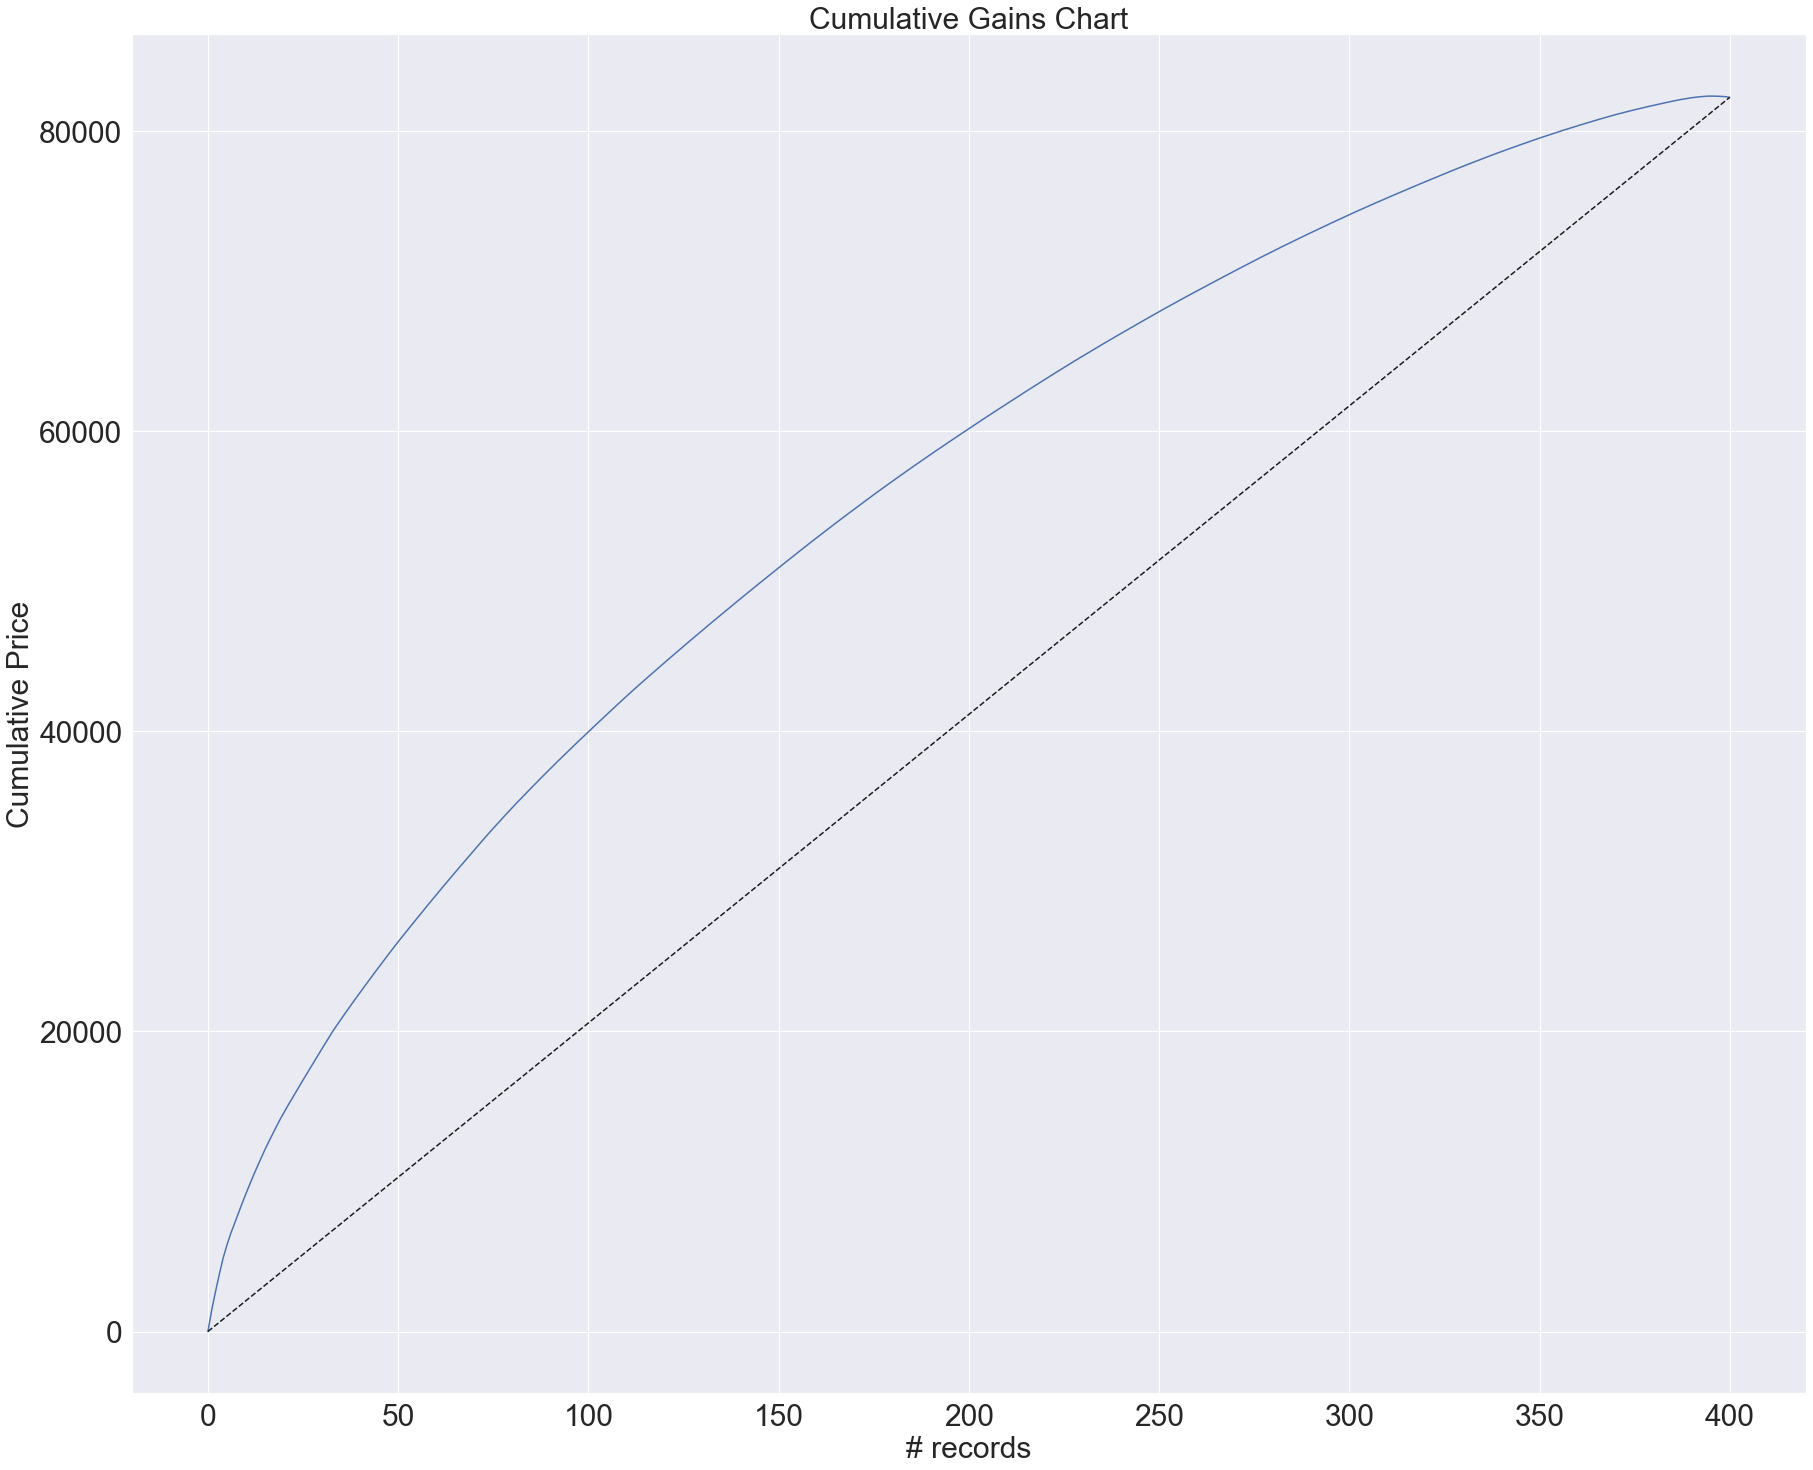

In [46]:
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

# Gains chart
ax = gainsChart(pred_v)
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)






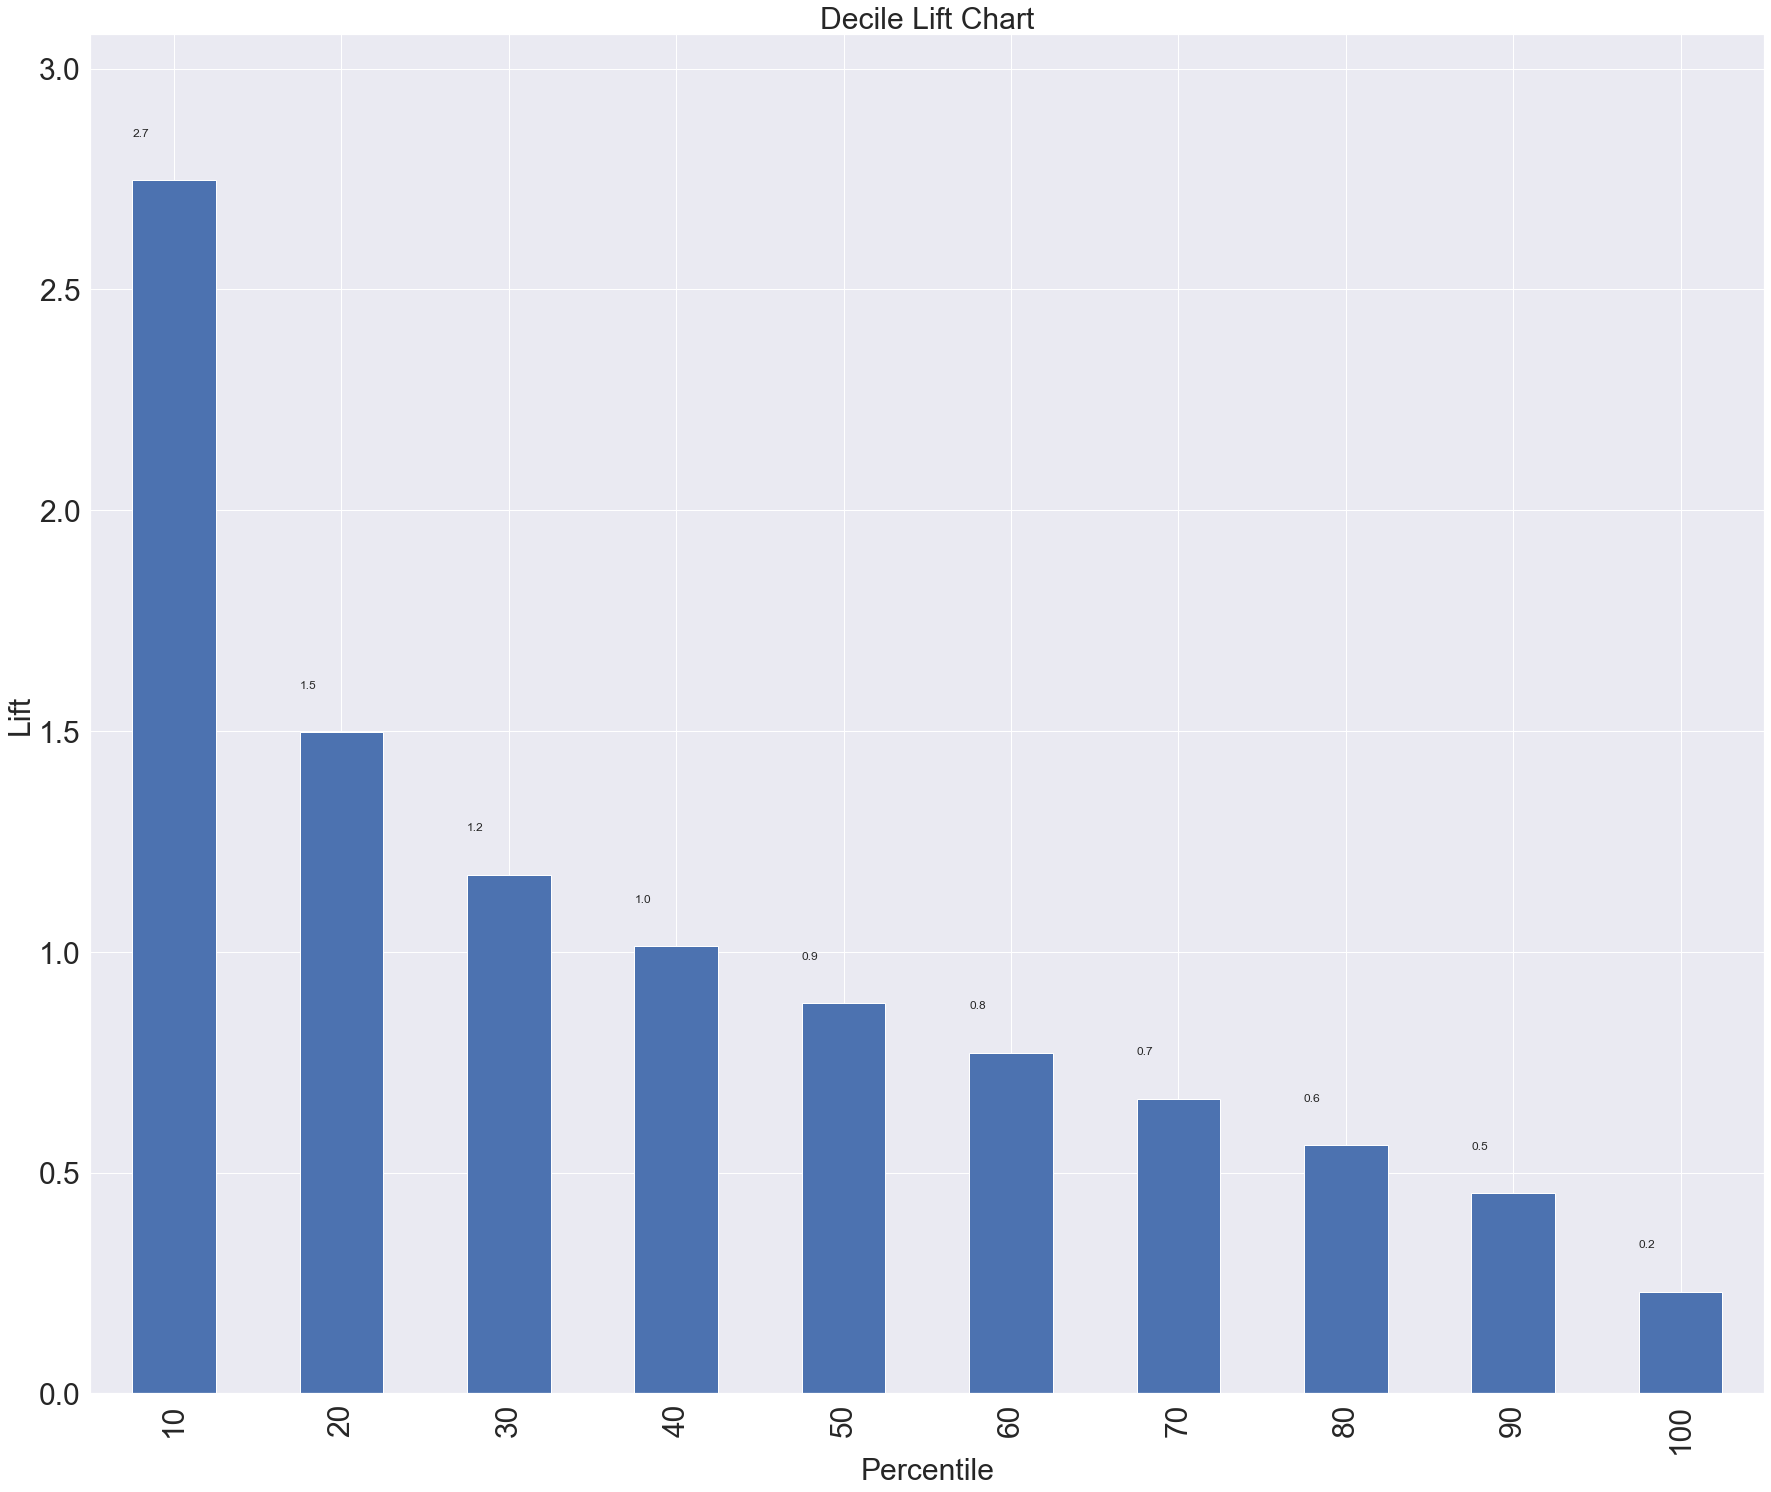

In [56]:
# Decile lift chart
ax = liftChart(pred_v)
ax.set_ylabel('Lift')
ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)